/Users/almo/Desktop/tmp/in/ms3Scans.txt
{'encoding': None, 'confidence': 0.0, 'language': None}
file not read or is empty: ms3Scans.
/Users/almo/Desktop/tmp/in/peptides.txt
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
/Users/almo/Desktop/tmp/in/mzRange.txt
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
/Users/almo/Desktop/tmp/in/msmsScans.txt
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
/Users/almo/Desktop/tmp/in/modificationSpecificPeptides.txt
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
/Users/almo/Desktop/tmp/in/allPeptides.txt
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
/Users/almo/Desktop/tmp/in/evidence.txt
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
/Users/almo/Desktop/tmp/in/matchedFeatures.txt
{'encoding': None, 'confidence': 0.0, 'language': None}
file not read or is empty: matchedFeatures.
/Users/almo/Desktop/tmp/in/parameters.txt
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
/Users/almo/Desk

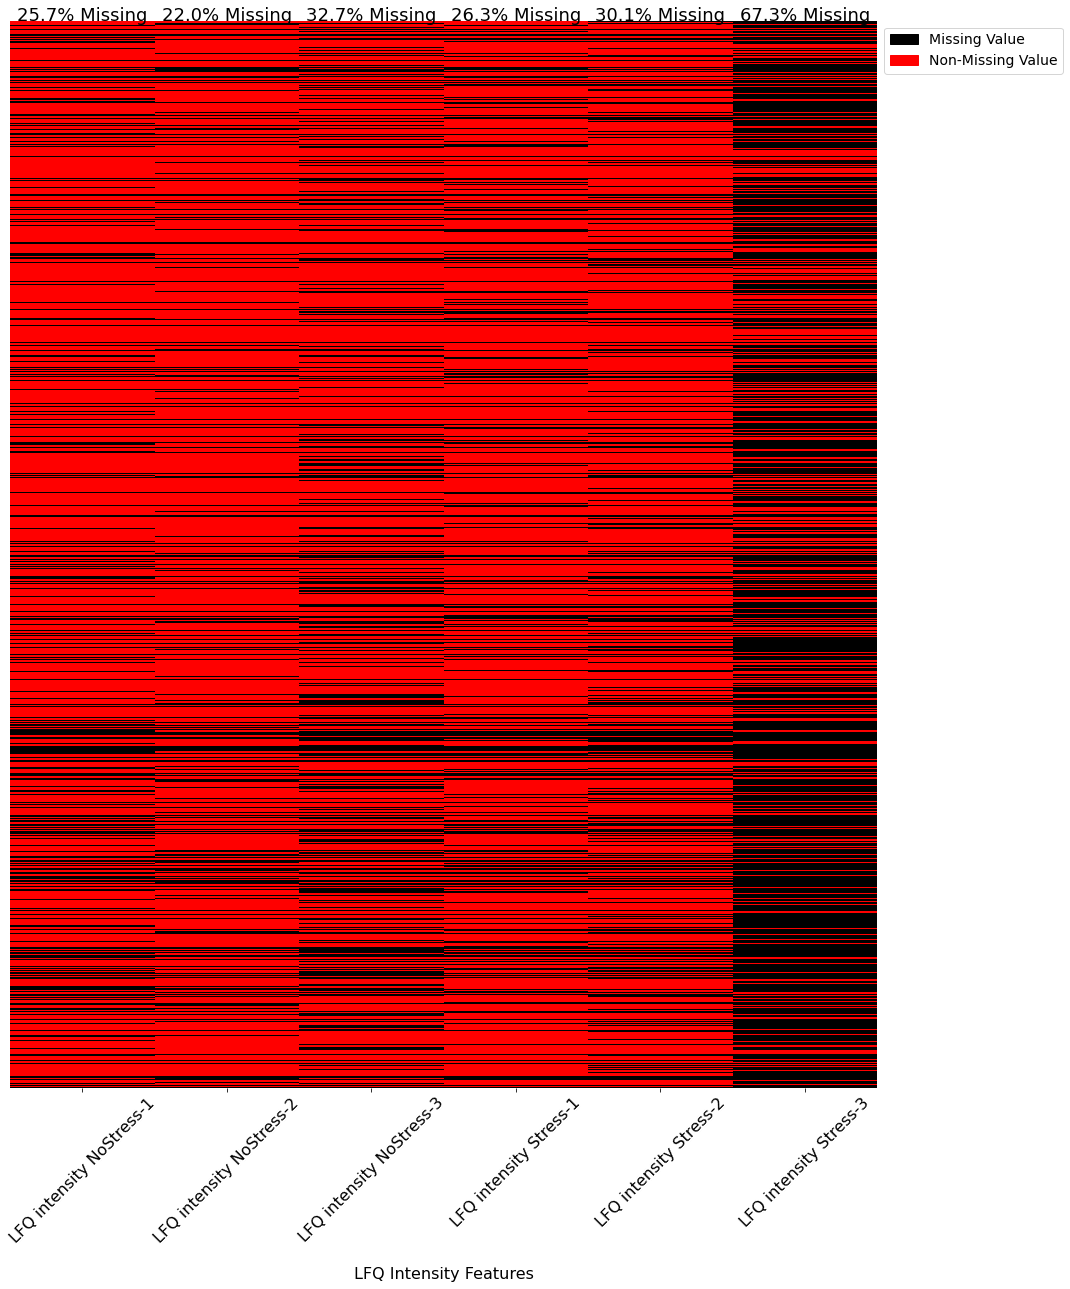

/Users/almo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


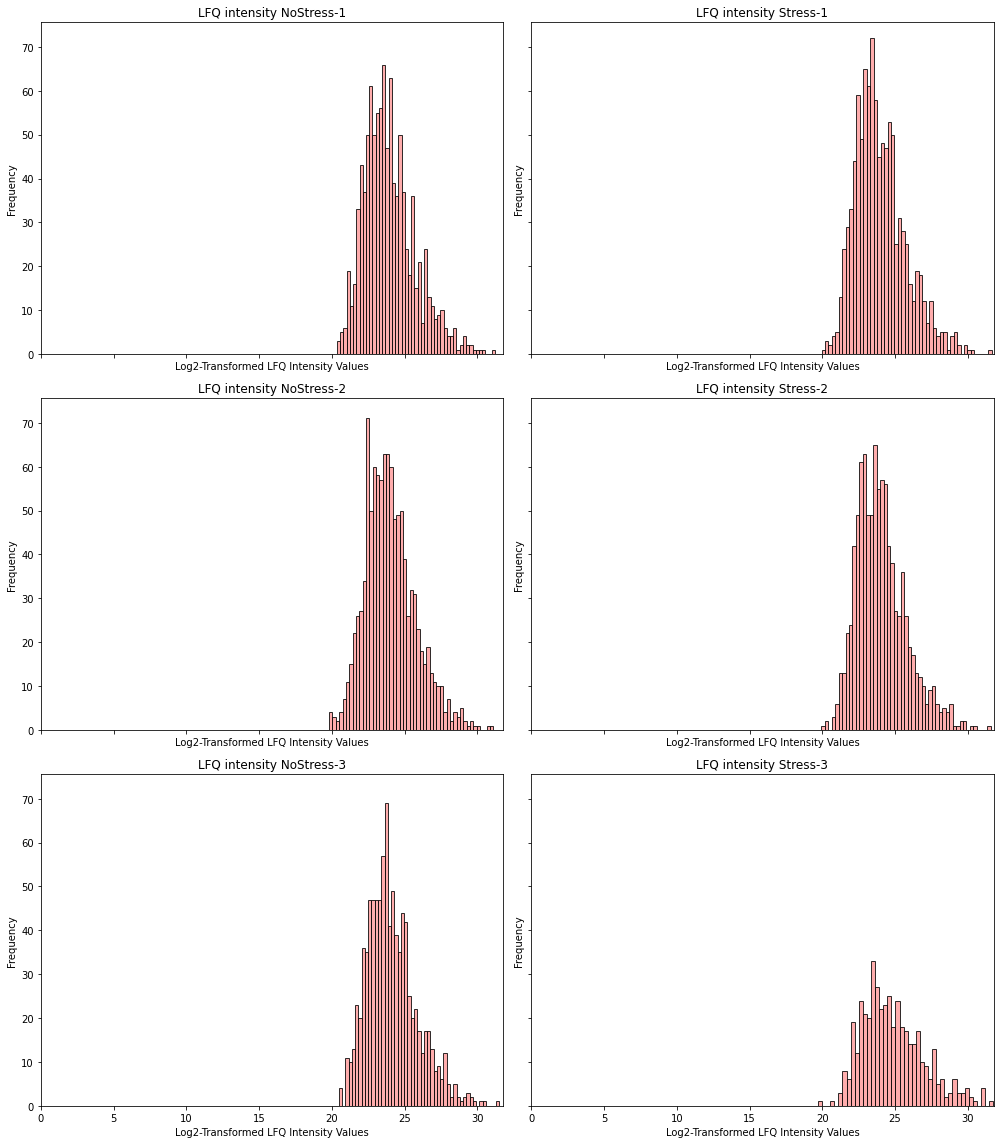

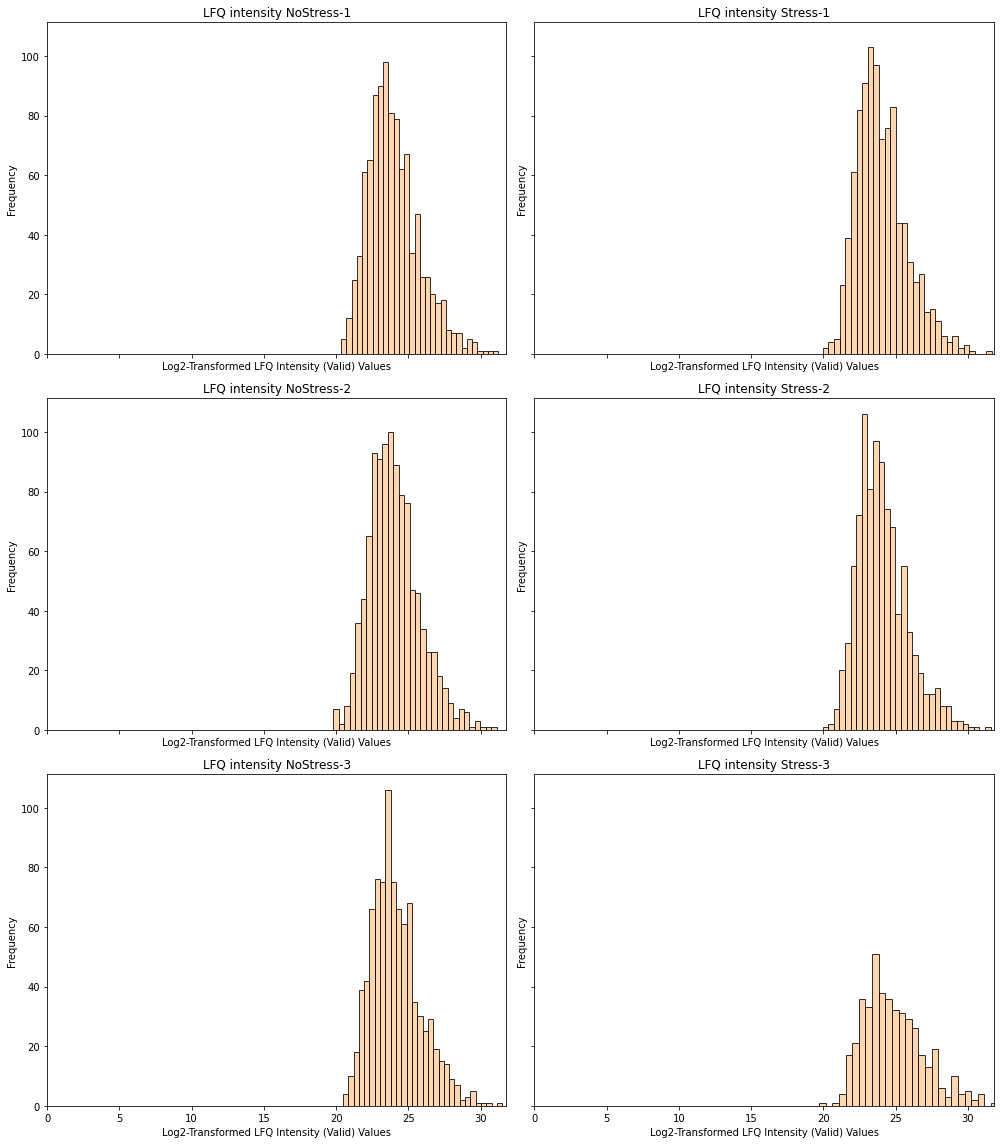

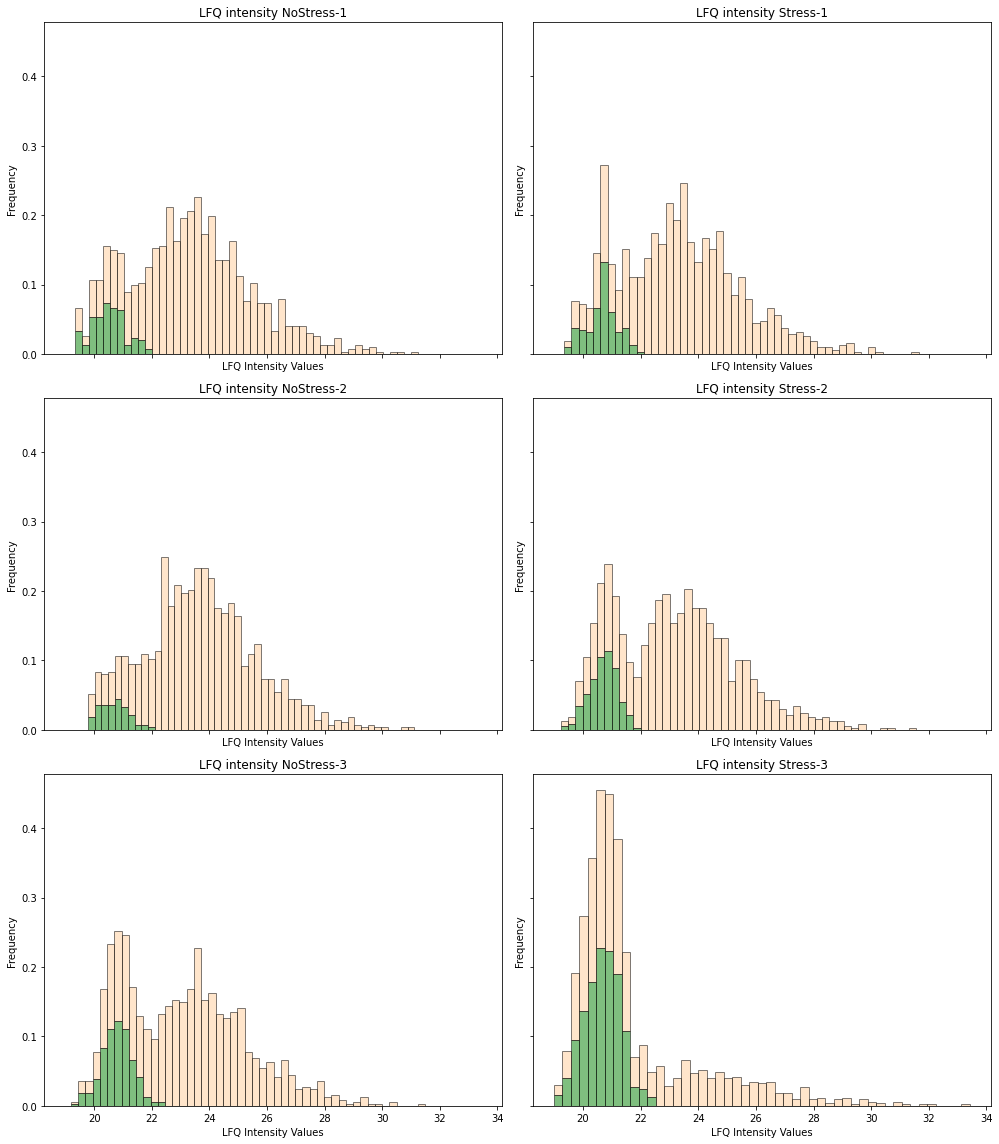

['Mean of NoStress Condition', 'Mean of Stress Condition']


<timed exec>:348: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


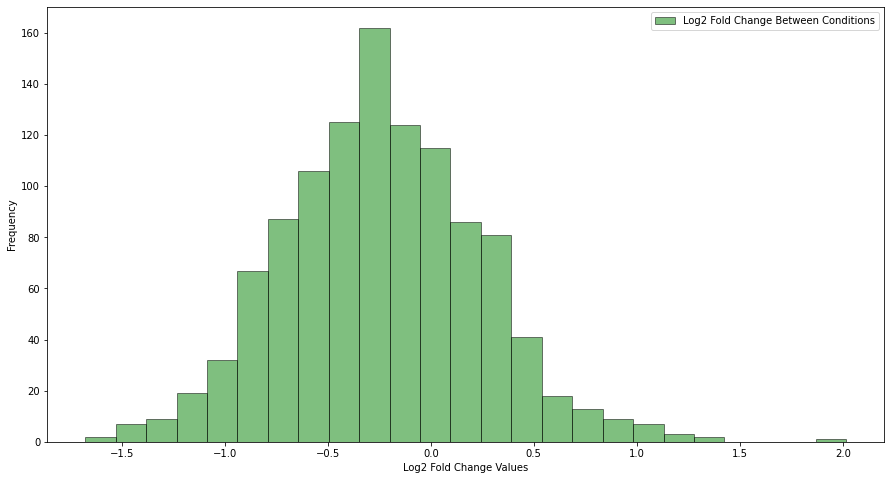

<Figure size 432x288 with 0 Axes>

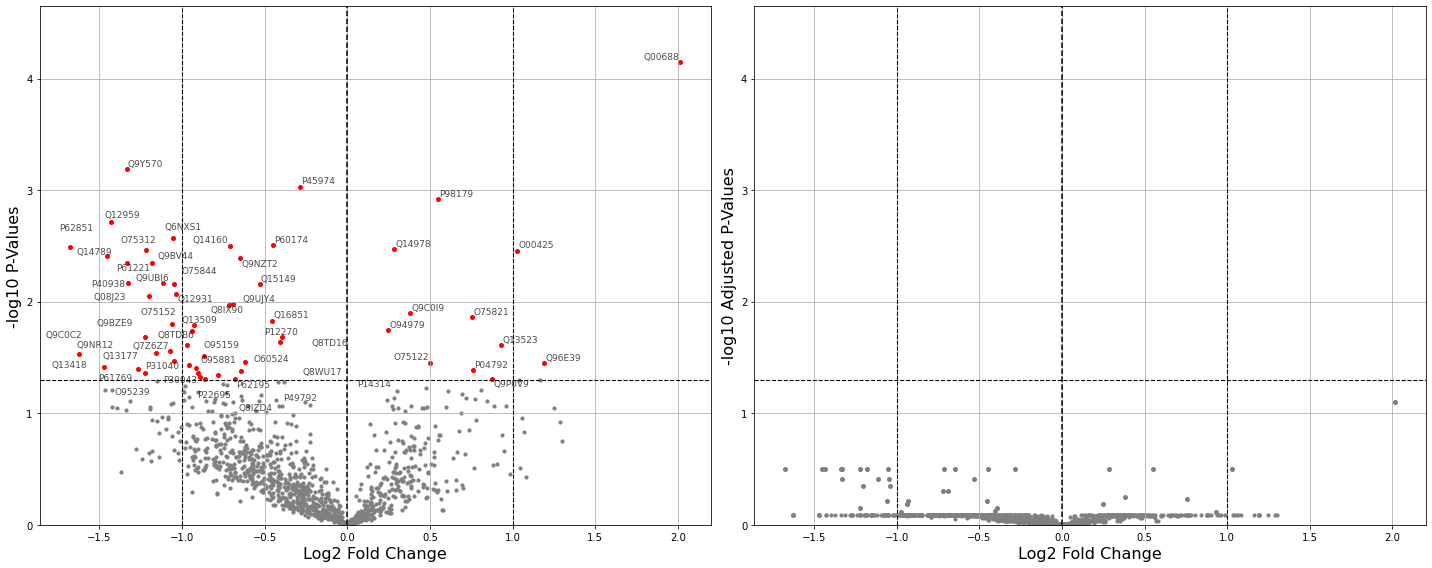

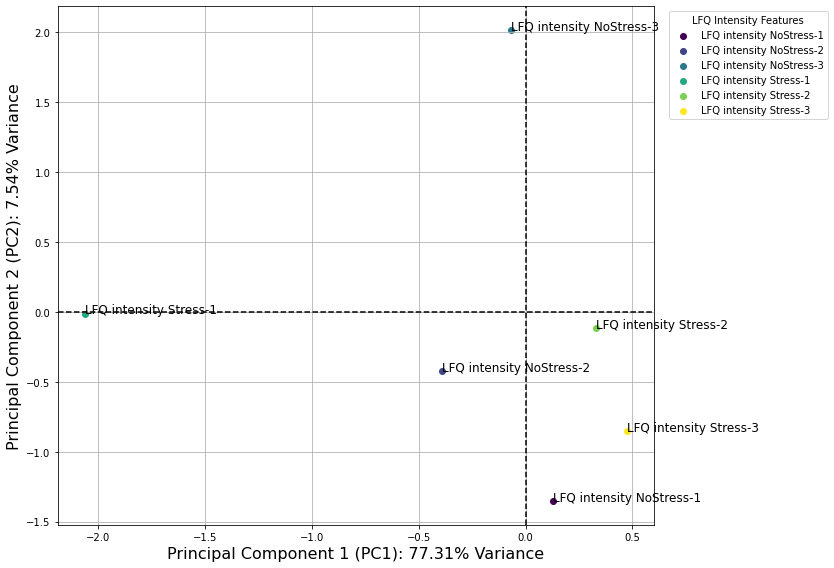

/Users/almo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/almo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


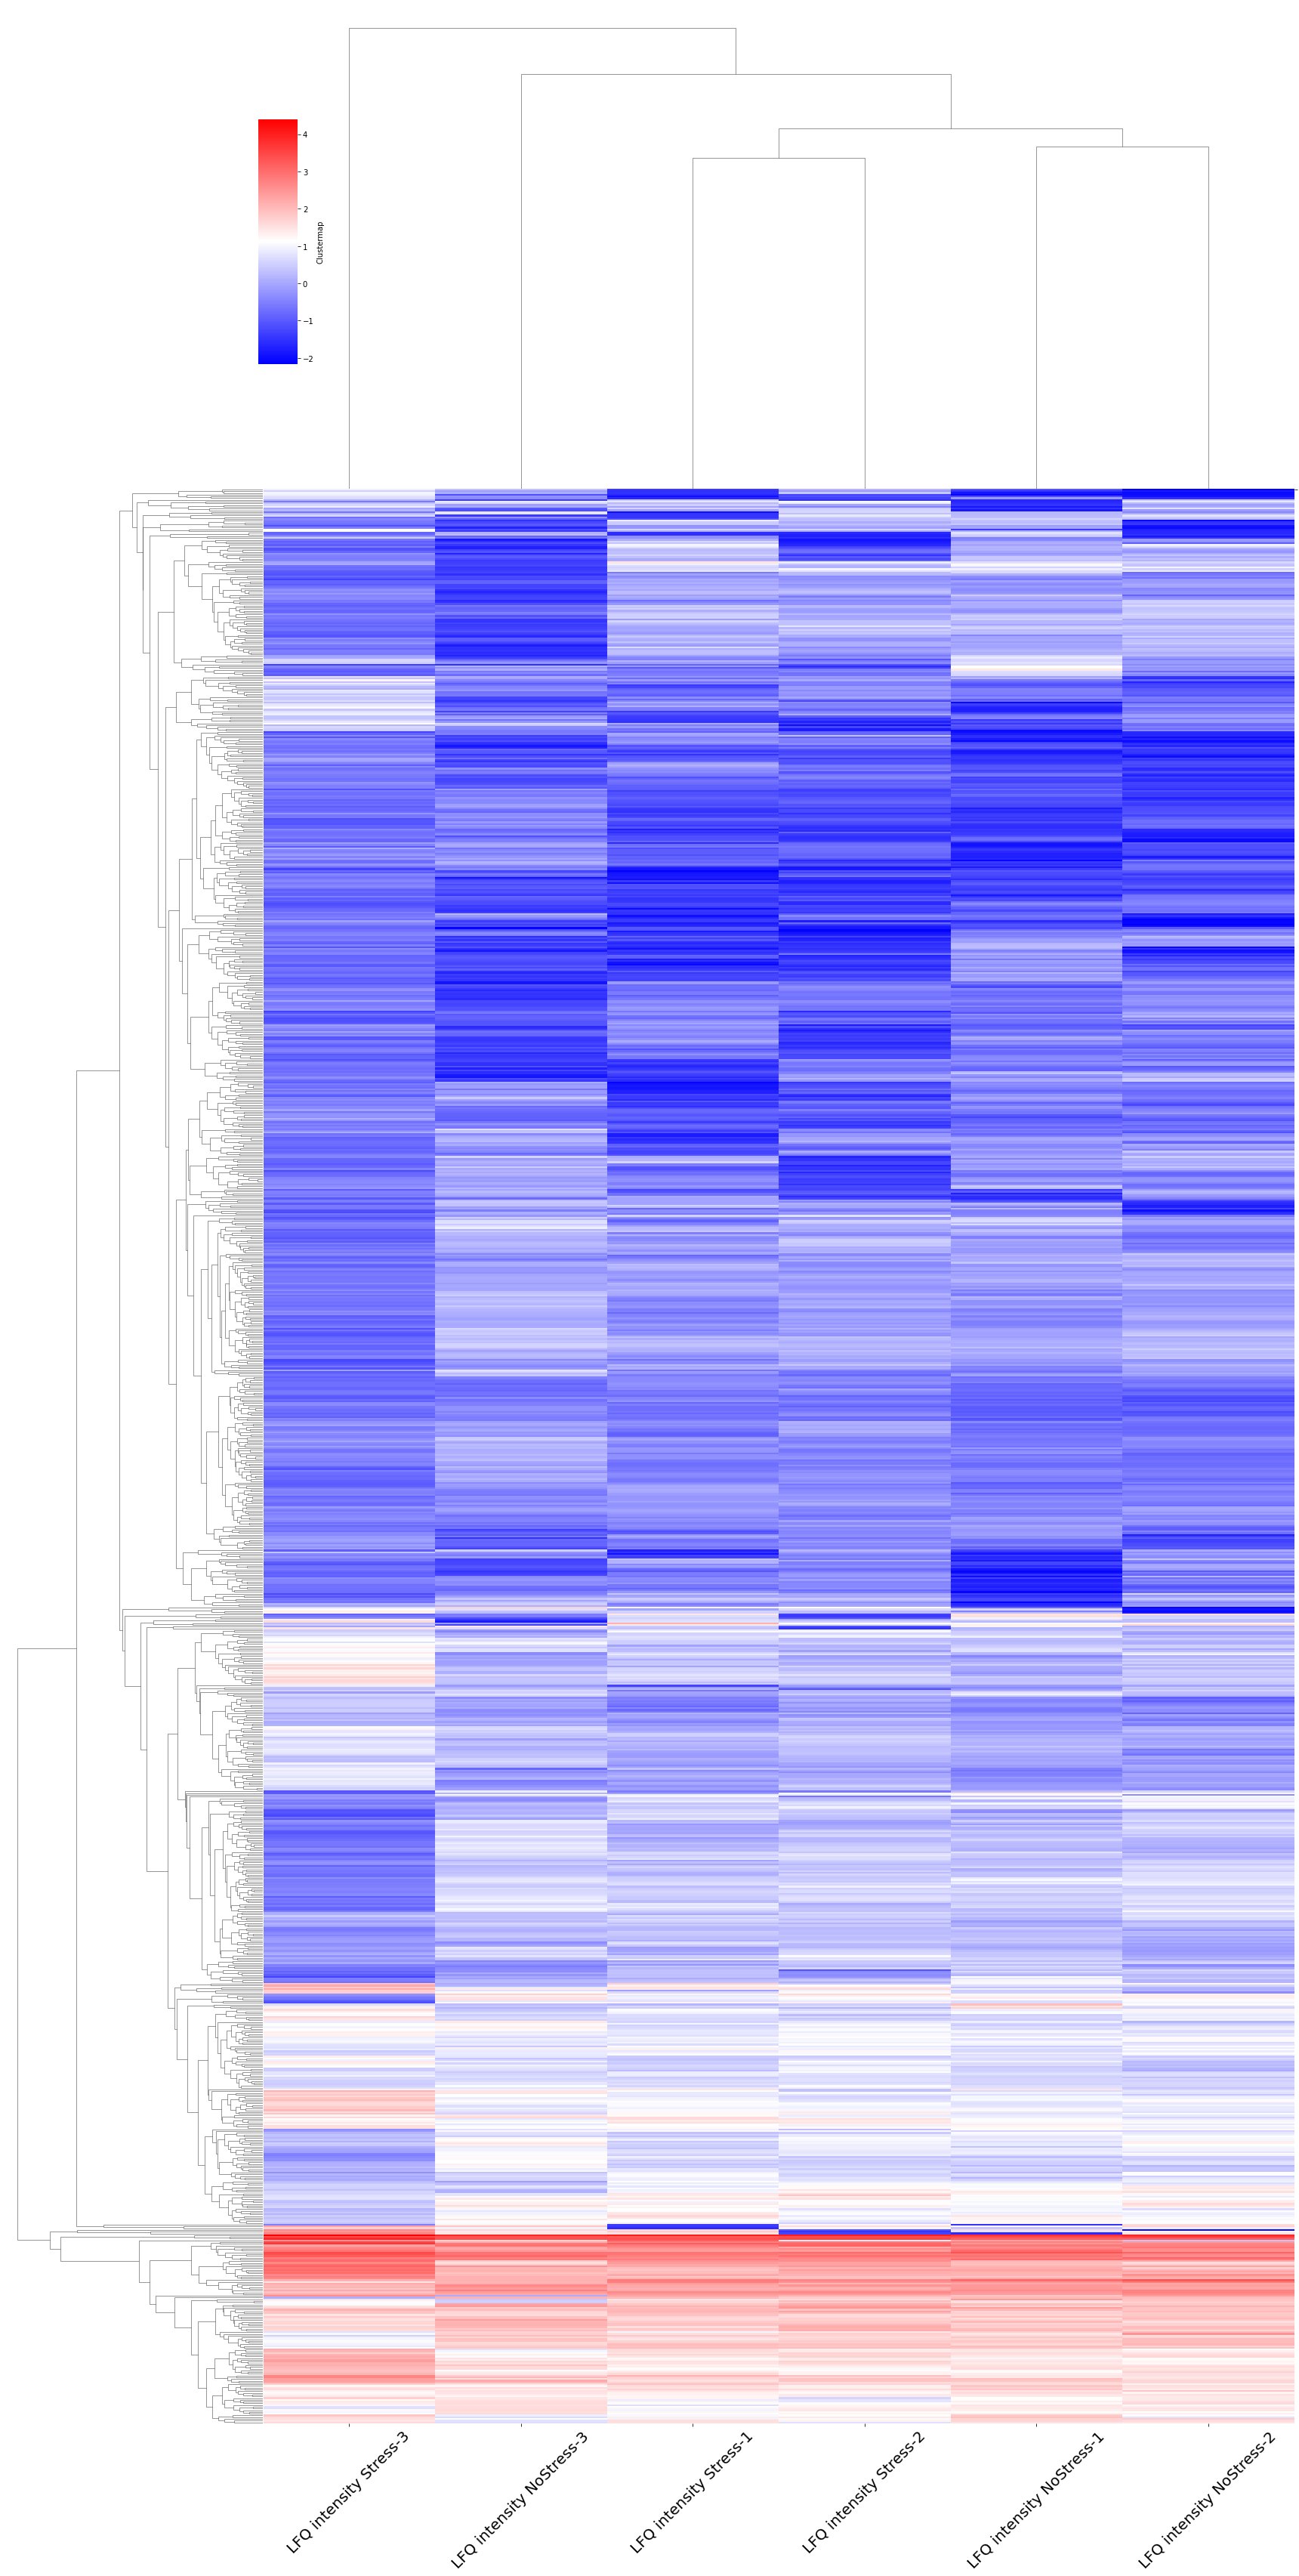

Loading BokehJS ...

Loading BokehJS ...

CPU times: user 3min 45s, sys: 15.1 s, total: 4min
Wall time: 5min 54s


In [4]:
%%time


#import modules for use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import os
import chardet
import statsmodels.api as sm
import math
import warnings
import seaborn as sns
import scipy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from scipy.stats import ttest_ind, levene, mannwhitneyu
import requests
import xml.etree.ElementTree as ET
import ast
import networkx as nx
import plotly.graph_objects as go
from matplotlib import cm
import os
from itertools import combinations
from scipy.stats import levene, ttest_ind, mannwhitneyu
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
from sklearn.impute import KNNImputer
import sys
import plotly.express as px
from fancyimpute import IterativeImputer
from statsmodels.sandbox.stats import multicomp
import matplotlib.colors
from adjustText import adjust_text
from dash import dash, dcc, html
from dash.dependencies import Input, Output
from dash import dcc, html, Input, Output, dash
import plotly.express as px
from dash.dependencies import Input, Output, State
import base64
import dash_bootstrap_components as dbc
import io
from matplotlib.patches import Patch
import networkx as nx
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColorBar
from bokeh.layouts import layout
from bokeh.models.sources import ColumnDataSource
from bokeh.palettes import Plasma256, Viridis256
from bokeh.transform import linear_cmap, LinearColorMapper
from bokeh.io import export_png, output_notebook, show
from matplotlib.patches import Patch

#Minimum directory information for app

figs_dir = '/Users/almo/Desktop/tmp/figs/'
in_dir = '/Users/almo/Desktop/tmp/in/'
out_dir = '/Users/almo/Desktop/tmp/out/'



#PARSE METADATA FROM FILES - excludes xml and pdf formats to avoid throwing errors


def get_files(in_dir, out_dir):
    txt_files = glob.glob(in_dir+'*')
    for file in txt_files:
        if os.path.isfile(file):
            if file[-3:] != 'txt':
                txt_files.remove(file)
        elif os.path.isdir(file):
            txt_files.remove(file)
    return txt_files
txt_files= get_files(in_dir, out_dir)

#FILE PARSER INTO CSV -- REMOVES CON__ and REV____ rows from files
def file_parser(txt_files, out_dir):

    maxInt = sys.maxsize
    csv.field_size_limit(maxInt)

    os.chdir(out_dir)
    csv_files = []
    for file_path in txt_files:
        if os.path.isfile(file_path):
            print(file_path)
            file_name = os.path.basename(file_path).split('.')[0]
            with open(file_path, 'rb') as file_check:
                file_encoding = chardet.detect(file_check.read())
                print(file_encoding)
                file_data = []
            with open(file_path, "r", encoding=file_encoding["encoding"]) as file_in:
                read_file = csv.reader(file_in, delimiter="\t")
                file_data = [row for row in read_file]
                file_data_df = pd.DataFrame(data=file_data)
                if len(file_data_df) < 1:
                    print(f'file not read or is empty: {file_name}.')
                    continue
                else:
                    file_data_df.columns = file_data_df.iloc[0]
                    file_data_df = file_data_df[1:]
                    filtered_df = file_data_df.loc[~file_data_df.apply(lambda x: x.astype(str).str.contains('CON_|REV_').any(), axis=1)]
                    filtered_df.to_csv(f'Processed_{file_name}.csv')
            csv_files.append(f'{out_dir}Processed_{file_name}.csv')
        else:
            continue
    return csv_files, out_dir

csv_files, out_dir = file_parser(txt_files, out_dir)

def get_metadata(out_dir):
    var_dir = f'{out_dir}Processed_summary.csv'
    file_in_df = pd.read_csv(var_dir)
    file_in_df = file_in_df[~file_in_df['Raw file'].str.contains('Total')]
    raw_file_names = [row['Raw file'] for index, row in file_in_df.iterrows() if row['Raw file'] != 'Total']
    replicates = [row['Experiment'] for index, row in file_in_df.iterrows()]
    conditions = list(set([i.split('-')[0] for i in replicates]))
    return raw_file_names, replicates, conditions
    
raw_file_names, replicates, conditions = get_metadata(out_dir)



#GENERATE BASE DATAFRAME USING THE PROTEINGROUPS FILE

def proteingroups_df(out_dir):
    df = pd.read_csv(f'{out_dir}/Processed_proteinGroups.csv')
    #pd.set_option('display.max_columns', 75)
    LFQ_cols = [i for i in df.columns if i.startswith('LFQ')]
    LFQ_vals = pd.DataFrame(df.loc[:, LFQ_cols].values.tolist())
    LFQ_vals_df = pd.DataFrame(df.loc[:, LFQ_cols].values.tolist(), columns=LFQ_cols)
    protein_ids = [i.strip().split(';')[0] for i in df['Protein IDs']]
    index = [i for i in range(0, len(df), 1)]
    #pep_count_RnU = [i.strip().split(';')[0] for i in df['Peptide counts (razor+unique)']]
    column_labels = ['Protein IDs']
    for i in LFQ_cols:
        column_labels.append(i)
    LFQ_vals_df.insert(0, column_labels[0], protein_ids)
    proteingroups_df = LFQ_vals_df
    proteingroups_df.to_csv(f'{figs_dir}proteingroups_df.csv')
    return proteingroups_df

proteingroups_df = proteingroups_df(out_dir)

def plot_missingness_heatmap(proteingroups_df, figs_dir):

    LFQ_cols = proteingroups_df.iloc[:, 1:].columns
    missingness_df = proteingroups_df[LFQ_cols].ne(0.0).astype(int)
    missing_percentages = (proteingroups_df[LFQ_cols] == 0).mean() * 100
    colors = ["black", "red"]
    cmap = sns.color_palette(colors)
    missing_heatmap, ax = plt.subplots(figsize=(15, 18))
    sns.heatmap(missingness_df, cmap=cmap, cbar=False, ax=ax, vmin=0, vmax=1, yticklabels=False)

    for idx, col in enumerate(LFQ_cols):
        ax.text(idx + 0.5, -6, f"{missing_percentages[col]:.1f}% Missing", 
                ha='center', va='center', 
                rotation=0, color='black', fontsize=18)

    ax.set_xlabel('\nLFQ Intensity Features', fontsize=16)
    ax.set_xticklabels(LFQ_cols, rotation=45, fontsize=16)
    legend_labels = [Patch(facecolor='black', edgecolor='black', label='Missing Value'),
                     Patch(facecolor='red', edgecolor='red', label='Non-Missing Value')] 
    ax.legend(handles=legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)

    plt.tight_layout()
    plt.savefig(f'{figs_dir}proteingroups_missingness_heatmap_final.jpeg', dpi=300)
    plt.show()
    return missing_heatmap

missing_heatmap = plot_missingness_heatmap(proteingroups_df, figs_dir)

def LFQ_log2_df(proteingroups_df):
    log2_df = proteingroups_df.copy(deep=True)
    #LFQ_vals = np.log2(log2_df.iloc[:,1:])
    log2_df.iloc[:,1:] = np.log2(log2_df.iloc[:,1:])
    log2_df.replace([np.inf, -np.inf], 0, inplace=True)
    return log2_df
log2_df = LFQ_log2_df(proteingroups_df)

#plot distributions before imputation 
def plot_log2_distribution(log2_df, replicates, conditions):
    
    row_index = int(len(replicates)/len(conditions))
    col_index = len(conditions)
    log2_fig, ax = plt.subplots(nrows=row_index, ncols=col_index, figsize=(14,16), sharey=True, sharex=True)

    for column_index, condition in enumerate(conditions):  #I changed this to loop over conditions, and properly define condition
        LFQ_cols = [col for col in log2_df.iloc[:, 1:].columns if "LFQ intensity " + condition in col]
        LFQ_condition_df = log2_df[LFQ_cols]

        for r_index, column in enumerate(LFQ_condition_df.columns):
            axes = (r_index, column_index)  #Using a tuple is more conventional for indexing
            data = log2_df[column].values.tolist()
            data = [val for val in data if val != 0]
            min_val, max_val = min(data), max(data)
            bin_edges = np.linspace(min_val, max_val, 50)
            ax[axes].hist(data, bins=bin_edges, density=False, alpha=0.8, align='mid', color='#FF9999', label='Pre-imputed LFQ Intensity distribution',
                          edgecolor='black',zorder=1)
            ax[axes].set_xlabel('Log2-Transformed LFQ Intensity Values')
            ax[axes].set_ylabel('Frequency')
            ax[axes].set_title(column)
            #ax[axes].grid(True, zorder=0)
            ax[axes].set_xlim(left=0)
            #ax[axes].legend()
    #plt.suptitle('Pre-imputed Distribution of Log2-Transformed LFQ Intensity Data \n')
    plt.tight_layout() 
    plt.savefig(f'{figs_dir}/Preimputed_Log2_Distribution_final.jpeg', dpi=600)
    #plt.show()
    return log2_fig

log2_fig = plot_log2_distribution(log2_df, replicates, conditions)


def valid_values_df(log2_df, conditions, replicates):
    
    valid_values_df = log2_df.copy()
    criteria = []
    index1= int(len(replicates)/len(conditions))
    index2 = len(replicates)
    LFQ_cols = [col for col in valid_values_df.iloc[:,1:].columns if 'LFQ intensity' in col]    
    valid_values = valid_values_df[LFQ_cols].apply(lambda row: (row[0:index1] != 0).sum() >= 2 or (row[index1:index2] != 0).sum() >=2, axis=1)
    criteria.append(valid_values)
    final_criteria = pd.concat(criteria, axis=1).any(axis=1)
    valid_values_df = valid_values_df[final_criteria].copy()    
    valid_values_df.to_csv(f'{figs_dir}valid_values_df.csv')

    return valid_values_df

valid_values_df = valid_values_df(log2_df, conditions, replicates)

def valid_values_distribution(valid_values_df, replicates, conditions):
    
    row_index = int(len(replicates)/len(conditions))
    col_index = len(conditions)
    valid_val_fig, ax = plt.subplots(nrows=row_index, ncols=col_index, figsize=(14,16), sharey=True, sharex=True)

    for column_index, condition in enumerate(conditions):
        LFQ_cols = [col for col in valid_values_df.iloc[:, 1:].columns if "LFQ intensity " + condition in col]
        LFQ_condition_df = valid_values_df[LFQ_cols]

        for r_index, column in enumerate(LFQ_condition_df.columns):
            axes = (r_index, column_index)
            data = valid_values_df[column].values.tolist()
            data = [val for val in data if val != 0]
            min_val, max_val = min(data), max(data)
            bin_edges = np.linspace(min_val, max_val, 50)
            ax[axes].hist(data, bins=30, density=False, alpha=0.8, align='mid',color='#FFCC99', label='Pre-Imputed Valid Value LFQ Intensity Distribution of Valid Values',
                          edgecolor='black', zorder=1)
            ax[axes].set_xlabel('Log2-Transformed LFQ Intensity (Valid) Values')
            ax[axes].set_ylabel('Frequency')
            ax[axes].set_yscale('linear')
            ax[axes].set_xscale('linear')
            ax[axes].set_title(column)
            ax[axes].set_xlim(left=0)
            #ax[axes].grid(True, zorder=0)
            #ax[axes].legend()
            
    #plt.suptitle('Pre-Imputed Valid Values LFQ Intensity Distribution \n')
    plt.tight_layout()
    plt.savefig(f'{figs_dir}/Valid_Values_Distribution_final.jpeg', dpi=600)
    plt.show()
    return valid_val_fig

valid_val_fig = valid_values_distribution(valid_values_df, replicates, conditions)

def plot_downshift_imputation(valid_values_df, conditions, replicates):
    valid_values_df_downshift = valid_values_df.copy(deep=True)
    #store imputed vals
    random_values_dict = {column: [] for column in valid_values_df_downshift.columns[1:]}
    
    #get row anf col index
    row_index = int(len(replicates) / len(conditions))
    col_index = len(conditions)
    fig, ax = plt.subplots(nrows=row_index, ncols=col_index, figsize=(14, 16), sharey=True, sharex=True)

    for column_index, condition in enumerate(conditions):
        LFQ_cols = [col for col in valid_values_df_downshift.iloc[:, 1:].columns if "LFQ intensity " + condition in col]
        LFQ_condition_df = valid_values_df_downshift[LFQ_cols]

        for r_index, column in enumerate(LFQ_condition_df.columns):

            #Imputation code
            no_zeroes_values = valid_values_df_downshift[valid_values_df_downshift[column] != 0][column]
            med = no_zeroes_values.median()
            std_dev = no_zeroes_values.std()
            downshifted_value = med - (1.8 * std_dev)
            
            #Update to draw from Gaussian distribution
            for index, value in valid_values_df_downshift[column].items():
                if value == 0:
                    random_value = np.random.normal(loc=downshifted_value, scale=0.3 * std_dev)
                    valid_values_df_downshift.at[index, column] = random_value
                    random_values_dict[column].append(random_value)

            #Plotting
            axes = (r_index, column_index)
            valid_data = valid_values_df_downshift[valid_values_df_downshift[column] != 0][column].values
            imputed_data = random_values_dict[column]
            combined_data = np.concatenate([valid_data, imputed_data])
            min_val, max_val = combined_data.min(), combined_data.max()
            bin_edges = np.linspace(min_val, max_val, 50)
            
            stacked_data = [imputed_data, valid_data]
            stacked_colours = ['green','#FFCC99']
            stacked_labels = ['Imputed LFQ Intensity values', 'LFQ distribution With Imputation']
            ax[axes].hist(stacked_data, bins=bin_edges, density=True,align='mid', alpha=0.5, color=stacked_colours, label='valid data',
                          edgecolor='black', stacked=True, zorder=1)

            ax[axes].set_xlabel('LFQ Intensity Values')
            ax[axes].set_ylabel('Frequency')
            ax[axes].set_yscale('linear')
            ax[axes].set_title(f'{column}')
            #ax[axes].grid(True, zorder=0)
    
    plt.tight_layout()
    valid_values_df_downshift.to_csv(f'{figs_dir}downshift_imputation_df.csv')
    plt.savefig(f'{figs_dir}/Valid_Values_with_Downshift_Imputation_Distribution_final.jpeg', dpi=400)
    plt.show()
    return valid_values_df_downshift
valid_values_df_downshift = plot_downshift_imputation(valid_values_df, conditions, replicates)

def log2_foldchange(valid_values_df_downshift, conditions):
    log_proteingroups_foldchange_df = valid_values_df_downshift.copy()
    
    means_per_row = {f'Mean of {condition} Condition': [] for condition in conditions}

    for index, row in log_proteingroups_foldchange_df.iterrows():
        for condition in conditions:
            matching_columns = [col for col in log_proteingroups_foldchange_df.columns if condition in col]
            if not matching_columns:
                continue  
            row_mean = float(row[matching_columns].mean())
            means_per_row[f'Mean of {condition} Condition'].append(row_mean)

    
    log_means_df = pd.DataFrame.from_dict(means_per_row, orient='index').transpose()
    log_means_df = log_means_df.reset_index(drop=True)
    log_proteingroups_foldchange_df = log_proteingroups_foldchange_df.reset_index(drop=True)
    log_proteingroups_foldchange_df = pd.concat([log_proteingroups_foldchange_df, log_means_df], axis=1)

    log2_fc_dict = {'Log2 Fold Change': []}
    mean_cols = [col for col in log_proteingroups_foldchange_df.columns if 'Mean' in col and 'Condition' in col]
    print(mean_cols)
    for index, row in log_proteingroups_foldchange_df[mean_cols].iterrows():
        log2_fc_dict['Log2 Fold Change'].append(float(row[1]-row[0]))

    log_foldchange_df = pd.DataFrame.from_dict(log2_fc_dict, orient='index').transpose()
    log_proteingroups_foldchange_df['Log2 Fold Change'] = log_foldchange_df.values
    return log_proteingroups_foldchange_df

log_proteingroups_foldchange_df = log2_foldchange(valid_values_df_downshift, conditions)

#---------------- PLOT HISTOGRAMS OF DISTRIBUTIONS -------------------------------

def plot_log_fold_change_dist(log_proteingroups_foldchange_df):
    
    data = log_proteingroups_foldchange_df['Log2 Fold Change']
    log2_dist_fig = plt.figure(figsize=(15, 8))
    plt.hist(data, bins=25, density=False, alpha=0.5, align='mid',color='green',label='Log2 Fold Change Between Conditions',
            edgecolor='black')
    plt.xlabel('Log2 Fold Change Values')
    plt.ylabel('Frequency')
    plt.yscale('linear')
    #plt.title(f'Histogram of LFQ Fold Change (log2 Transformed)')
    plt.legend()
    plt.show()
    plt.savefig(f'{figs_dir}/Log2_Fold_Change_Histogram_final.jpeg', dpi=600)
    return log2_dist_fig
 
log2_dist_fig = plot_log_fold_change_dist(log_proteingroups_foldchange_df)

def do_independent_t(log_proteingroups_foldchange_df, conditions, replicates):
    index1 = 0
    index2 = int(len(replicates)/len(conditions))
    LFQ_cols = [col for col in log_proteingroups_foldchange_df if 'LFQ' in col]
    condition1_cols = LFQ_cols[index1:index2]
    condition2_cols = LFQ_cols[index2:len(replicates)]
    p_values = []
    
    #row-wise ind t-tests
    for index, row in log_proteingroups_foldchange_df.iterrows():
        condition1_vals = row[condition1_cols].astype(float).dropna().values
        condition2_vals = row[condition2_cols].astype(float).dropna().values
        #assess equal variances and normality
        equal_var, equal_var_p = levene(condition1_vals, condition2_vals)
        norm_stat, norm_p = levene(condition1_vals, condition2_vals)
        t_stat, ind_p_value = ttest_ind(condition1_vals, condition2_vals)
        p_values.append(ind_p_value)
    #do p_valur adjustment using benjamini-hochberg
    adjusted_p_values = stats.false_discovery_control(p_values, method='bh')
    #add columns to dataframe
    log_proteingroups_foldchange_df['P-Values'] = p_values
    log_proteingroups_foldchange_df['-log10 P-Values']= -np.log10(p_values)
    log_proteingroups_foldchange_df['Adjusted P-Values'] = adjusted_p_values
    log_proteingroups_foldchange_df['-log10 Adjusted P-Values'] = -(np.log10(adjusted_p_values))
    return log_proteingroups_foldchange_df
log_proteingroups_foldchange_df = do_independent_t(log_proteingroups_foldchange_df, conditions, replicates)

def plot_combined_volcano(log_proteingroups_foldchange_df, conditions):
    
    
    log2_foldchange_values = log_proteingroups_foldchange_df['Log2 Fold Change'].values
    p_values = log_proteingroups_foldchange_df['-log10 P-Values'].values
    adjusted_p_values = log_proteingroups_foldchange_df['-log10 Adjusted P-Values'].values
    protein_ids = log_proteingroups_foldchange_df['Protein IDs'].values
    sig_indices = np.where(p_values >= 1.3)[0]
    
    texts1 = []
    texts2 = []
    
    #subplotting
    volcano_fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))    
    
    ax1.axvline(x=0, color='black', linestyle='--')
    ax1.scatter(log2_foldchange_values, p_values, c='grey', s=10)
    ax1.scatter(log2_foldchange_values[sig_indices], p_values[sig_indices], c='red', s=15)
    for idx in sig_indices:
        texts1.append(ax1.text(log2_foldchange_values[idx], p_values[idx], protein_ids[idx], fontsize=9, alpha=0.7))
    ax1.set_xlabel('Log2 Fold Change', fontsize=16)
    ax1.set_ylabel('-log10 P-Values', fontsize=16)
    ax1.axhline(y=1.3, color='black', linestyle='--', linewidth=1.1, alpha=1)
    ax1.axvline(x=-1, color='black', linestyle='--', linewidth=1.1, alpha=1)
    ax1.axvline(x=1, color='black', linestyle='--', linewidth=1.1, alpha=1)
    ax1.grid(True)
    
    ax2.axvline(x=0, color='black', linestyle='--')
    ax2.scatter(log2_foldchange_values, adjusted_p_values, c='grey', s=10)
    ax2.scatter(log2_foldchange_values[sig_indices], adjusted_p_values[sig_indices], c='grey', s=15)
#    for idx in sig_indices:
#        texts2.append(ax2.text(log2_foldchange_values[idx], adjusted_p_values[idx], protein_ids[idx], fontsize=9, alpha=0.7))
    ax2.set_xlabel('Log2 Fold Change', fontsize=16)
    ax2.set_ylabel('-log10 Adjusted P-Values', fontsize=16)
    ax2.axhline(y=1.3, color='black', linestyle='--', linewidth=1.1, alpha=1)
    ax2.axvline(x=-1, color='black', linestyle='--', linewidth=1.1, alpha=1)
    ax2.axvline(x=1, color='black', linestyle='--', linewidth=1.1, alpha=1)    
    ax2.grid(True)

    
    max_y = max(max(p_values), max(adjusted_p_values))
    ax1.set_ylim(0, max_y + 0.5)  
    ax2.set_ylim(0, max_y + 0.5)  
    adjust_text(texts1, ax=ax1)
    #adjust_text(texts2, ax=ax2)

    plt.tight_layout()
    plt.savefig(f'{figs_dir}combined_volcano_plot_final.jpeg', dpi=800)
    plt.show()

    return log_proteingroups_foldchange_df, volcano_fig

log_proteingroups_foldchange_df, volcano_fig = plot_combined_volcano(log_proteingroups_foldchange_df, conditions)

def PCA_do(log_proteingroups_foldchange_df, replicates, conditions):
    index1 = 0
    index2 = len(replicates)
    log_PCA_data_df = log_proteingroups_foldchange_df.iloc[:, 1:index2+1]
    log_PCA_df = pd.DataFrame()
    PCA_vals = log_PCA_data_df.values

    #plot PCA components - should be 6 for 6 of the groups
    y = log_PCA_data_df.columns.tolist()
    X = PCA_vals
    
    pca_model = PCA()
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    X_pca = pca_model.fit_transform(X_std)
    explained_variance_ratio = pca_model.explained_variance_ratio_
    components = pca_model.components_.T
    unique_colors = plt.cm.viridis(np.linspace(0, 1, len(y)))
    
    #Plotting
    PCA_fig = plt.figure(figsize=(12, 8))
    for i, label in enumerate(y):
        plt.scatter(X_pca[i, 0], X_pca[i, 1], label=label, color=unique_colors[i])
    
    plt.xlabel(f'Principal Component 1 (PC1): {explained_variance_ratio[0]*100:.2f}% Variance', fontsize=16)
    plt.ylabel(f'Principal Component 2 (PC2): {explained_variance_ratio[1]*100:.2f}% Variance', fontsize=16)
    plt.axhline(0, linewidth=1.5, linestyle='--', color='black')
    plt.axvline(0, linewidth=1.5, linestyle='--', color='black')
    
 
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), title="LFQ Intensity Features")
    plt.tight_layout()
    plt.grid(True)
    
    for i, label in enumerate(y):
        plt.annotate(label, (X_pca[i, 0], X_pca[i, 1]), fontsize=12)
    
    plt.savefig(f'{figs_dir}PCA_plot_final.jpeg', dpi=600)
    plt.show()
    return PCA_fig

PCA_fig = PCA_do(log_proteingroups_foldchange_df, replicates, conditions)

def Clustermap(figs_dir, replicates, log_proteingroups_foldchange_df):
    index1 = len(replicates)
    clustermap_df = log_proteingroups_foldchange_df.iloc[:,0:1+index1]
    colors = [(0, "blue"), (0.5, "white"), (1, "red")]
    colormap = LinearSegmentedColormap.from_list("blue_white_red", colors)

    #Z-transform column data
    scaler = StandardScaler()
    clustermap_df.iloc[:,1:] = scaler.fit_transform(clustermap_df.iloc[:,1:])
        
    proteins = clustermap_df['Protein IDs']
    LFQ_data = clustermap_df.iloc[:,1:]
    maxmax = LFQ_data.values.max().max()
    minmin = LFQ_data.values.min().min()
    
    #Plot clustrmap
    y_ticks = [i for i in range(0, len(LFQ_data), 1)]
    clustermap = sns.clustermap(
        LFQ_data,
        cmap=colormap,
        figsize=(24, 45),
        vmin=minmin,
        vmax=maxmax,
        yticklabels=[None],
        metric='Euclidean',
        cbar_kws={'label': 'Clustermap'},
        cbar_pos=(0.2, 0.85, 0.03, 0.1)  #Position and size of colorbar
    )

    plt.setp(clustermap.ax_heatmap.get_xticklabels(), rotation=45, fontsize=20)
    
    fig_width, fig_height = plt.gcf().get_size_inches()
    label_offset = 0.02 * fig_width 
    clustermap.ax_heatmap.yaxis.set_tick_params(pad=5)
    clustermap.savefig(f'{figs_dir}Clustermap_final.jpeg', dpi=600)
    clustermap_df.to_csv(f'{figs_dir}Clustermap_df.csv')
    plt.show()
    return clustermap_df, clustermap

clustermap_df, clustermap = Clustermap(figs_dir, replicates, log_proteingroups_foldchange_df)

def get_accessions(log_proteingroups_foldchange_df):
    accessions = [i for i in log_proteingroups_foldchange_df['Protein IDs']]
    return accessions

accessions = get_accessions(log_proteingroups_foldchange_df)

def map_accessions_to_STRING_ids(accessions):
    Uniprot_to_STRING_mappings = {}
    string_api_url = "https://version-11-5.string-db.org/api"
    output_format = "tsv-no-header"
    method = "get_string_ids"
    params = {

        "identifiers" : "\r".join(accessions),
        "species" : 9606, #species NCBI identifier 
        "limit" : 1, #only one (best) identifier per input protein
        "echo_query" : 1, #see your input identifiers in the output
        "columns": "id, proteinNames",
    }

    request_url = "/".join([string_api_url, output_format, method])
    results = requests.post(request_url, data=params)

    for line in results.text.strip().split("\n"):
        l = line.split("\t")
        input_identifier, string_identifier, proteinName = l[0], l[2], l[6].strip().split(';')[0]
        Uniprot_to_STRING_mappings[input_identifier] = [string_identifier, proteinName]
    return Uniprot_to_STRING_mappings

Uniprot_to_STRING_mappings = map_accessions_to_STRING_ids(accessions)

def get_interactions_between_accessions(Uniprot_to_STRING_mappings):
    
    STRING_interaction_info = []
    accessions = [key for key, value in Uniprot_to_STRING_mappings.items()]
    string_api_url = "https://version-11-5.string-db.org/api"
    output_format = "tsv-no-header"
    method = "network"
    
    #Construct URL
    request_url = "/".join([string_api_url, output_format, method])

    #Set parameters
    params = {
        "identifiers": "\n".join(accessions), 
        "species": 9606,  #species identifier 
    }

    #Call STRING
    response = requests.post(request_url, data=params)

    #Check for successful response
    if response.status_code == 200:
        interactions = response.text
        #print(interactions)
    else:
        print(f"Error {response.status_code}: {response.text}")
    for line in response.text.strip().split('\n'):
        key_info = line.strip().split('\t')
        uniprot2ensembl_id, interacting_id, uniprot2ensembl_protein, interacting_id_protein, combined_score  = key_info[0], key_info[1], key_info[2], key_info[3], float(key_info[5])
        STRING_interaction_info.append([uniprot2ensembl_id, uniprot2ensembl_protein, interacting_id, interacting_id_protein, combined_score])
    return STRING_interaction_info
STRING_interaction_info = get_interactions_between_accessions(Uniprot_to_STRING_mappings)

def parse_interactions(STRING_interaction_info):
    columns = ['Ensembl Protein ID','Gene Name','Ensembl Interacting Protein ID','Interacting Gene Name', 'Combined Score']
    interaction_df = pd.DataFrame(STRING_interaction_info, columns=columns)
    
    #mask duped rows
    duplicate_mask = interaction_df.duplicated(subset=columns)
    interactions_df = interaction_df[~duplicate_mask].reset_index(drop=True)
    ens_to_uniprot_map = {value[0]: (key, value[1]) for key, value in Uniprot_to_STRING_mappings.items()}
    
    interactions_df['UniProt Accession'] = interactions_df['Ensembl Protein ID'].map(lambda x: ens_to_uniprot_map.get(x, (None, None))[0])
    interactions_df['UniProt Protein Name'] = interactions_df['Ensembl Protein ID'].map(lambda x: ens_to_uniprot_map.get(x, (None, None))[1])
    interactions_df['UniProt Interacting Accession'] = interactions_df['Ensembl Interacting Protein ID'].map(lambda x: ens_to_uniprot_map.get(x, (None, None))[0])
    interactions_df['UniProt Interacting Protein Name'] = interactions_df['Ensembl Interacting Protein ID'].map(lambda x: ens_to_uniprot_map.get(x, (None, None))[1])
    
    column_order = ['UniProt Accession', 'Ensembl Protein ID', 'Gene Name', 'UniProt Protein Name', 
                    'UniProt Interacting Accession', 'Ensembl Interacting Protein ID', 'Interacting Gene Name', 
                    'UniProt Interacting Protein Name', 'Combined Score']
    
    interactions_df = interactions_df[column_order]
    
    return interactions_df

interactions_df = parse_interactions(STRING_interaction_info)

def get_subcellular_localisation(accession):
    url = f"https://www.uniprot.org/uniprot/{accession}.xml"

    response = requests.get(url)

    if response.ok:
        xml_data = response.text
        root = ET.fromstring(xml_data)
        ns = {"uniprot": "http://uniprot.org/uniprot"}

        #find all subcellular location annotations
        locations = root.findall(".//uniprot:subcellularLocation", namespaces=ns)

        subcellular_localizations = []
        for location in locations:
            #extract the subcellular localisation
            localization = location.find("uniprot:location", namespaces=ns).text
            subcellular_localizations.append(localization)
        return subcellular_localizations
    else:
        print(f"Error retrieving subcellular localszation for {accession}")
        return []
    
def fetch_GO_data(accession):
    url = f"https://rest.uniprot.org/uniprotkb/{accession}.xml"
    response = requests.get(url)

    processes = []
    if response.ok:
        root = ET.fromstring(response.text)
        ns = {"uni": "http://uniprot.org/uniprot"}
        process_elements = root.findall(".//uni:dbReference[@type='GO']", namespaces=ns)
        for process_element in process_elements:
            process_term = process_element.find("./uni:property[@type='term']", namespaces=ns).get("value")
            processes.append(process_term)
    else:
        print("Error occurred:", response.status_code)

    return processes

def process_GO_data(accessions):
    GO_dict = {accession: {'Process': [], 'Function': [], 'Localisation': []} for accession in accessions}

    for count, accession in enumerate(accessions, 1):
        #print('Remaining accessions:', len(accessions)-count+1)

        GO_data = fetch_GO_data(accession)
        for data in GO_data:
            if data.startswith('C:'):
                GO_dict[accession]['Localisation'].append(data)
            elif data.startswith('F:'):
                GO_dict[accession]['Function'].append(data)
            elif data.startswith('P:'):
                GO_dict[accession]['Process'].append(data)

    return GO_dict

def get_GO_df(GO_dict):
    GO_df = pd.DataFrame.from_dict(GO_dict, orient='index')
    GO_df = GO_df.reset_index()
    GO_df = GO_df.rename(columns={'index': 'UniProt Accession'})
    return GO_df


GO_dict = process_GO_data(accessions)
GO_df = get_GO_df(GO_dict)

def remove_prefix_from_list(prefix, lst):
    return [item.replace(prefix, '') for item in lst]
def remove_prefixes(GO_df):
    for col in GO_df.columns[1:]:
        GO_df[col] = GO_df[col].apply(lambda x: remove_prefix_from_list('P:', x))
        GO_df[col] = GO_df[col].apply(lambda y: remove_prefix_from_list('F:', y))
        GO_df[col] = GO_df[col].apply(lambda z: remove_prefix_from_list('C:', z))
    return GO_df
GO_df = remove_prefixes(GO_df)
#GO_df.head()

def merge_final_df(log_proteingroups_foldchange_df,GO_df, interactions_df, replicates):
    final_proteins_dict = {}
    final_proteins_cols = log_proteingroups_foldchange_df.columns[1:]
    for index, row in log_proteingroups_foldchange_df.iterrows():
        final_proteins_dict[row['Protein IDs']] = row[final_proteins_cols].values
    dict_list = [{'Protein IDs': k, **{final_proteins_cols[i]: v[i] for i in range(len(v))}} for k, v in final_proteins_dict.items()]
    final_interactions_df = pd.DataFrame(dict_list)

    final_interactions_df = interactions_df.merge(final_interactions_df, left_on='UniProt Accession', right_on='Protein IDs')
    cols_to_move = final_interactions_df.iloc[:,9:]
    cols_to_move_headings = cols_to_move.columns
    final_interactions_df.drop(columns=cols_to_move_headings, inplace=True)
    for col in reversed(cols_to_move_headings):
        final_interactions_df.insert(4, col, cols_to_move[col])
    final_interactions_df.drop(columns='Protein IDs', inplace=True)
    final_interactions_df = final_interactions_df.merge(GO_df, on='UniProt Accession', how='inner')
    cols_list = final_interactions_df.columns.tolist()
    new_order = cols_list[:2] + cols_list[-3:] + cols_list[2:-3]
    final_interactions_df = final_interactions_df[new_order]
    
    overall_mean = (final_interactions_df.iloc[:, 13] + final_interactions_df.iloc[:, 14]) / 2
    final_interactions_df.insert(15, column='Weighted Mean LFQ Intensity', value=overall_mean)
    
    #round LFQ weighted mean
    final_interactions_df['Weighted Mean LFQ Intensity'] = round(final_interactions_df['Weighted Mean LFQ Intensity'], 2)
    final_interactions_df['P-Values'] = round(final_interactions_df['P-Values'], 2)
    final_interactions_df['-log10 P-Values'] = round(final_interactions_df['-log10 P-Values'], 2)
    final_interactions_df['-log10 Adjusted P-Values'] = round(final_interactions_df['-log10 Adjusted P-Values'], 2)
    final_interactions_df['Log2 Fold Change'] = round(final_interactions_df['Log2 Fold Change'], 2)
    
    final_interactions_df['-log10 P-Values'] = final_interactions_df['-log10 P-Values'].astype(float)
    final_interactions_df['Log2 Fold Change'] = final_interactions_df['Log2 Fold Change'].astype(float)
    
    
    
    #convrt lists into strings in GO cols
    final_interactions_df['Process'] = final_interactions_df['Process'].apply(lambda x: ', '.join(x))
    final_interactions_df['Function'] = final_interactions_df['Function'].apply(lambda x: ', '.join(x))
    final_interactions_df['Localisation'] = final_interactions_df['Localisation'].apply(lambda x: ', '.join(x))

    return final_interactions_df

final_interactions_df = merge_final_df(log_proteingroups_foldchange_df, GO_df, interactions_df, replicates)


#generate interactomes 

def filter_upreg_interactions(final_interactions_df):
    upreg_interactions_df = final_interactions_df[(final_interactions_df['-log10 P-Values'] >= 1.3) & (final_interactions_df['Log2 Fold Change'] > 1.0)]
    upreg_interactions_df.to_csv(f'{figs_dir}score_filtered_interactions_df_upregulated.csv')
    return upreg_interactions_df
upreg_interactions_df = filter_upreg_interactions(final_interactions_df)

def generate_2D_Interactome(upreg_interactions_df):
    
    #rescal e values
    def rescale(values, out_min, out_max):
        in_min, in_max = min(values), max(values)
        if in_max == in_min:
            return [out_min for _ in values]
        return [(x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min for x in values]

    G = nx.Graph(name='')
    
    for index, row in upreg_interactions_df.iterrows():
        a = row['UniProt Accession']
        b = row['UniProt Interacting Accession']
        w = float(row['Combined Score'])
        G.add_weighted_edges_from([(a, b, w)])
    
    #add in extra labels for ndoes, weighted LFQ mean, interacting accessions and GO information
    
    
    #defining colormaps
    node_colormap = Plasma256
    edge_colormap = Viridis256
    
    #node colours based on degree
    c = rescale([G.degree(v) for v in G], 0.0, len(node_colormap) - 1)
    c = [node_colormap[int(i)] for i in c]
    
    #node size based on betweenness centrality
    bc = nx.betweenness_centrality(G)
    s = rescale([v for v in bc.values()], 10, 60)
    
    #edge width (ew)  and colours (ec)  based on edge weights
    ew = rescale([float(G[u][v]['weight']) for u,v in G.edges], 0.0, 1.0)
    ec = rescale([float(G[u][v]['weight']) for u,v in G.edges], 0.0, len(edge_colormap) - 1)
    ec = [edge_colormap[int(i)] for i in ec]

    pos = nx.spring_layout(G)

    upreg_network = figure(width=800, height=800, title='An Interaction Plot of Proteins with Greater Proximal Abundance under Stress Condition')

    #node info
    
    weighted_lfq_means = []
    GO_info_func = []
    GO_info_process = []
    GO_info_loc = []
    pv = []
    apv = []
    gn = []
    lfc = []
    mlpv = []
    
    for node in G.nodes():
        #filterin rows where 'UniProt Accession' matches the current node
        associated_rows = upreg_interactions_df[upreg_interactions_df['UniProt Accession'] == node]
        lfq_for_node = ", ".join(map(str,np.unique(associated_rows['Weighted Mean LFQ Intensity'].tolist())))
        p_values = ", ".join(map(str,np.unique(associated_rows['P-Values'].tolist())))
        log10_p_vals = ", ".join(map(str,np.unique(associated_rows['-log10 P-Values'].tolist())))
        log10_adj = ", ".join(map(str,np.unique(associated_rows['-log10 Adjusted P-Values'].tolist())))
        log2_fc =", ".join(map(str,np.unique(associated_rows['Log2 Fold Change'].tolist())))
        GO_func_for_node =", ".join(np.unique(associated_rows['Function'].tolist()))
        GO_proc_for_node = ", ".join(np.unique(associated_rows['Process'].tolist()))
        GO_loc_for_node = ", ".join(np.unique(associated_rows['Localisation'].tolist()))
        gene_name = ", ".join(map(str,np.unique(associated_rows['Gene Name'].tolist())))

        weighted_lfq_means.append(lfq_for_node)
        GO_info_func.append(GO_func_for_node)
        GO_info_process.append(GO_proc_for_node)
        GO_info_loc.append(GO_loc_for_node)
        pv.append(p_values)
        gn.append(gene_name)
        lfc.append(log2_fc)
        mlpv.append(log10_p_vals)
        
        
    node_info = ColumnDataSource(pd.DataFrame({
        'x': [pos[key][0] for key in pos],
        'y': [pos[key][1] for key in pos],
        'color': c,
        'size': s,
        'protein_name': list(G.nodes()),
        'gene_name':gn,
        'Weighted_Mean': weighted_lfq_means,
        'p_value': pv,
        'log10_p_value': mlpv,
        'log2_fc':lfc,
        'GO_Function': GO_info_func,
        'GO_Process': GO_info_process,
        'GO_Localisation': GO_info_loc
        
    }))
    
    edge_info = ColumnDataSource(pd.DataFrame({
        'xs': [[pos[u][0], pos[v][0]] for u, v in G.edges()],
        'ys': [[pos[u][1], pos[v][1]] for u, v in G.edges()],
        'color': ec,
        'weight': ew
    }))

    #Hover for node info
    hover_nodes = HoverTool(tooltips=[
            ('Protein', '@protein_name'),
            ('Gene_Name', '@gene_name'),
            ('Weighted_LFQ', '@Weighted_Mean'),
            ('p_value', '@p_value'),
            ('neg_log10_p_value', '@log10_p_value'),
            ('log2_fold_change', '@log2_fc'),
            ('Function', '@GO_Function'),
            ('Process', '@GO_Process'),
            ('Localisation', '@GO_Localisation')
        ], renderers=[])

    #Draw nodes and edges
    r_edges = upreg_network.multi_line('xs', 'ys', source=edge_info, color='color', line_alpha=1.8, line_width=0.8)
    r_nodes = upreg_network.circle('x', 'y', size='size', source=node_info, color='color', alpha=0.8)

    hover_nodes.renderers.append(r_nodes)
    upreg_network.add_tools(hover_nodes)
    
    degrees = [G.degree(v) for v in G.nodes()]
    min_degree = min(degrees)
    max_degree = max(degrees)
    node_mapper = LinearColorMapper(palette=node_colormap, low=min_degree, high=max_degree)
    node_color_bar = ColorBar(color_mapper=node_mapper, width=8, location=(0,0), title="Node Degree")
    upreg_network.add_layout(node_color_bar, 'left')

    #Edge Colourbar
    min_edge_confidence = np.min(upreg_interactions_df['Combined Score'])
    max_edge_confidence = np.max(upreg_interactions_df['Combined Score'])
    edge_mapper = LinearColorMapper(palette=edge_colormap, low=min_edge_confidence, high=max_edge_confidence)
    edge_color_bar = ColorBar(color_mapper=edge_mapper, width=28, location=(0,0), title="Edge Weight = Combined Score")
    upreg_network.add_layout(edge_color_bar, 'right')
    export_png(upreg_network, filename=f"{figs_dir}interactome_p_up.png")
    output_notebook()
    show(upreg_network)
    return upreg_network

upreg_network = generate_2D_Interactome(upreg_interactions_df)

def filter_downreg_interactions(final_interactions_df):
    downreg_interactions_df = final_interactions_df[(final_interactions_df['-log10 P-Values'] >= 1.3) & (final_interactions_df['Log2 Fold Change'] < -1.0)]
    downreg_interactions_df.to_csv(f'{figs_dir}score_filtered_interactions_df_downregulated.csv')
    return downreg_interactions_df
downreg_interactions_df = filter_downreg_interactions(final_interactions_df)

def generate_2D_Interactome(downreg_interactions_df):
    
    #rescale values
    def rescale(values, out_min, out_max):
        in_min, in_max = min(values), max(values)
        if in_max == in_min:
            return [out_min for _ in values]
        return [(x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min for x in values]

    G = nx.Graph(name='')
    
    for index, row in downreg_interactions_df.iterrows():
        a = row['UniProt Accession']
        b = row['UniProt Interacting Accession']
        w = float(row['Combined Score'])
        G.add_weighted_edges_from([(a, b, w)])
    
    #add in extra labels for ndoes, weighted LFQ mean, interacting accessions and GO information
    
    node_colormap = Plasma256
    edge_colormap = Viridis256
    
    c = rescale([G.degree(v) for v in G], 0.0, len(node_colormap) - 1)
    c = [node_colormap[int(i)] for i in c]
    
    bc = nx.betweenness_centrality(G)
    s = rescale([v for v in bc.values()], 10, 60)
    
    ew = rescale([float(G[u][v]['weight']) for u,v in G.edges], 0.0, 1.0)
    ec = rescale([float(G[u][v]['weight']) for u,v in G.edges], 0.0, len(edge_colormap) - 1)
    ec = [edge_colormap[int(i)] for i in ec]

    pos = nx.spring_layout(G)

    downreg_network = figure(width=800, height=800, title='An Interaction Plot of Proteins with Greater Proximal Abundance under NoStress Condition')

    #node info/data
    
    weighted_lfq_means = []
    GO_info_func = []
    GO_info_process = []
    GO_info_loc = []
    pv = []
    apv = []
    gn = []
    lfc = []
    mlpv = []
    
    for node in G.nodes():
        #filter rows where the 'UniProt Accession' matches the current node
        associated_rows = downreg_interactions_df[downreg_interactions_df['UniProt Accession'] == node]
        lfq_for_node = ", ".join(map(str,np.unique(associated_rows['Weighted Mean LFQ Intensity'].tolist())))
        p_values = ", ".join(map(str,np.unique(associated_rows['P-Values'].tolist())))
        log10_p_vals = ", ".join(map(str,np.unique(associated_rows['-log10 P-Values'].tolist())))
        log10_adj = ", ".join(map(str,np.unique(associated_rows['-log10 Adjusted P-Values'].tolist())))
        log2_fc =", ".join(map(str,np.unique(associated_rows['Log2 Fold Change'].tolist())))
        GO_func_for_node =", ".join(np.unique(associated_rows['Function'].tolist()))
        GO_proc_for_node = ", ".join(np.unique(associated_rows['Process'].tolist()))
        GO_loc_for_node = ", ".join(np.unique(associated_rows['Localisation'].tolist()))
        gene_name = ", ".join(map(str,np.unique(associated_rows['Gene Name'].tolist())))

        weighted_lfq_means.append(lfq_for_node)
        GO_info_func.append(GO_func_for_node)
        GO_info_process.append(GO_proc_for_node)
        GO_info_loc.append(GO_loc_for_node)
        pv.append(p_values)
        gn.append(gene_name)
        lfc.append(log2_fc)
        mlpv.append(log10_p_vals)
        
        
    node_info = ColumnDataSource(pd.DataFrame({
        'x': [pos[key][0] for key in pos],
        'y': [pos[key][1] for key in pos],
        'color': c,
        'size': s,
        'protein_name': list(G.nodes()),
        'gene_name':gn,
        'Weighted_Mean': weighted_lfq_means,
        'p_value': pv,
        'log10_p_value': mlpv,
        'log2_fc':lfc,
        'GO_Function': GO_info_func,
        'GO_Process': GO_info_process,
        'GO_Localisation': GO_info_loc
        
    }))
    
    edge_info = ColumnDataSource(pd.DataFrame({
        'xs': [[pos[u][0], pos[v][0]] for u, v in G.edges()],
        'ys': [[pos[u][1], pos[v][1]] for u, v in G.edges()],
        'color': ec,
        'weight': ew
    }))

    #Hover for node info
    hover_nodes = HoverTool(tooltips=[
            ('Protein', '@protein_name'),
            ('Gene_Name', '@gene_name'),
            ('Weighted_LFQ', '@Weighted_Mean'),
            ('p_value', '@p_value'),
            ('neg_log10_p_value', '@log10_p_value'),
            ('log2_fold_change', '@log2_fc'),
            ('Function', '@GO_Function'),
            ('Process', '@GO_Process'),
            ('Localisation', '@GO_Localisation')
        ], renderers=[])

    #Draw nodes and edges
    r_edges = downreg_network.multi_line('xs', 'ys', source=edge_info, color='color', line_alpha=1.8, line_width=0.8)
    r_nodes = downreg_network.circle('x', 'y', size='size', source=node_info, color='color', alpha=0.8)

    hover_nodes.renderers.append(r_nodes)
    downreg_network.add_tools(hover_nodes)
    
    degrees = [G.degree(v) for v in G.nodes()]
    min_degree = min(degrees)
    max_degree = max(degrees)
    node_mapper = LinearColorMapper(palette=node_colormap, low=min_degree, high=max_degree)
    node_color_bar = ColorBar(color_mapper=node_mapper, width=8, location=(0,0), title="Node Degree")
    downreg_network.add_layout(node_color_bar, 'left')

    #Edge Colourbar
    min_edge_confidence = np.min(downreg_interactions_df['Combined Score'])
    max_edge_confidence = np.max(downreg_interactions_df['Combined Score'])
    edge_mapper = LinearColorMapper(palette=edge_colormap, low=min_edge_confidence, high=max_edge_confidence)
    edge_color_bar = ColorBar(color_mapper=edge_mapper, width=28, location=(0,0), title="Edge Weight = Combined Score")
    downreg_network.add_layout(edge_color_bar, 'right')
    export_png(downreg_network, filename=f"{figs_dir}interactome_p_down.png")
    output_notebook() #enables plot to be shown in console instead of a pop-up webpage
    show(downreg_network)
    return downreg_network

downreg_network = generate_2D_Interactome(downreg_interactions_df)


